<a href="https://colab.research.google.com/github/MartinezJohan94/Matematicas_para_el_aprendizaje_de_maquinas/blob/main/Taller_Modelos_de_aprendizaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller Modelos de aprendizaje (Johan Sebástian Martínez Benítez)

For this assignment you will use the following SVM implementation for classifying these datasets:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication

https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.


# Introducción
La detección de billetes falsos es un desafío crucial en el ámbito financiero y de seguridad. A medida que las técnicas de falsificación se vuelven cada vez más sofisticadas, es fundamental contar con herramientas efectivas y confiables para identificar billetes auténticos y proteger la integridad de los sistemas monetarios. En este contexto, el método de 'Support Vector Machine' (SVM) se ha destacado como una técnica importante para el procesamiento imágenes y por tanto puede resultar como una herramienta notable para la tarea de distinguir billetes falsos de genuinos.

Adicionalmente, la detección y monitoreo de la ocupación en espacios interiores es esencial en diversos contextos, como la eficiencia energética, la seguridad y el confort. Tradicionalmente, se han utilizado métodos basados en sensores de movimiento para detectar la presencia de personas en una habitación. Sin embargo, estos enfoques pueden ser limitados o inexactos en entornos donde el movimiento no es suficiente para determinar la ocupación de manera precisa. En este sentido, el método SVM se presenta como una solución prometedora para detectar la ocupación de una habitación a partir de características ambientales del lugar.

Este método se basa en el análisis de patrones para clasificar datos en dos clases o etiquetas distintas. En el caso de la detección de billetes falsos, un SVM puede ser entrenado utilizando características específicas de los billetes auténticos y falsos, como detalles de impresión, texturas, patrones de colores y características de seguridad. En el contexto de la detección de ocupación, el SVM puede ser entrenado utilizando características ambientales recopiladas a partir de sensores desplegados en la habitación. Estas características pueden incluir información sobre la humedad, la temperatura, la calidad del aire y otros parámetros relevantes del ambiente.


# DATA SET 1 (Billetes)

**DATA SET 1:**
Tomada de la web "Machine Learning Repository". 
https://archive.ics.uci.edu/ml/datasets/banknote+authentication

1.   El ejercicio de aprendizaje automático con esta data consiste en indicar si el billete de la imagen es genuino o falso a partir de las características allí registradas. 

In [90]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
import random
from scipy.stats import kurtosis

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from google.colab import drive
drive.mount('/content/drive')
billetes = pd.read_csv('/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Taller 1/data_billetes.txt', sep=',')
billetes.loc[billetes['Clase'] <1, 'Clase'] = -1                                #Renombramos la etiqueta 0 con -1
#billetes.info()
num_registros, num_variables=billetes.shape


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Esta data corresponde a datos extraídos de imágenes que fueron tomadas para la evaluación de un procedimiento de autenticación para billetes. Los datos se extrajeron de imágenes tomadas de muestras genuinas y falsificadas similares a billetes. Para la digitalización, se utiilzó una cámara industrial generalmente utilizada para la inspección de la impresión. Las imágenes finales tienen entre 400 x 400 pixeles. Debido a la lente del objeto investigado, se obtuvieron imágenes en escala de grises con una resolución de aproximadamente 600dpi. Se utilizó la Transformada Wavelet para extraer características de las imágenes. Para comprender un poco mejor esto, considérese una "wavelet" como una oscilación con una amplitud que inicia en cero, aumenta o disminuye y vuelve a cero una o más veces. Son utilizadas para extraer información de diferentes tipos de datos como señales de audio o imágenes que es el caso de este ejercicio. Así, la transformada es utilizada para la compresión de imágenes (usando la compresión wavelet) de manera que se almacenen los datos de imagen en la menor cantidad de espacio posible. 



In [91]:
#Análisis descriptivo de la data
print(f"El dataset 'billetes' cuenta con {num_registros} registros y {num_variables} variables.")
print(f"El dataset 'billetes' cuenta con las variables {billetes.columns.tolist()}")
#billetes.isna().sum()

# Estadísticas descriptivas para todas las columnas
#print(billetes.describe())
#print(f"la moda de la varianza es  {billetes['Varianza_WT'].mode()}.")

El dataset 'billetes' cuenta con 1372 registros y 5 variables.
El dataset 'billetes' cuenta con las variables ['Varianza_WT', 'Asimetria_WT', 'Curtosis_WT', 'Entropia_WT', 'Clase']


  El dataset cuenta con 1372 registros, cada uno con 5 variables o características. De estas, 4 corresponden a datos cuantitativos y la otra restante corresponde a una variable cualitativa o factor. Las variables son:

*   **"Clase"**: Es la etiqueta que indica si los datos representan un billete falso o no; dentro de la data corresponde a una variable de tipo cualitativo representada por los valores 1 y -1 (billete genuino y falso respectivamente). 

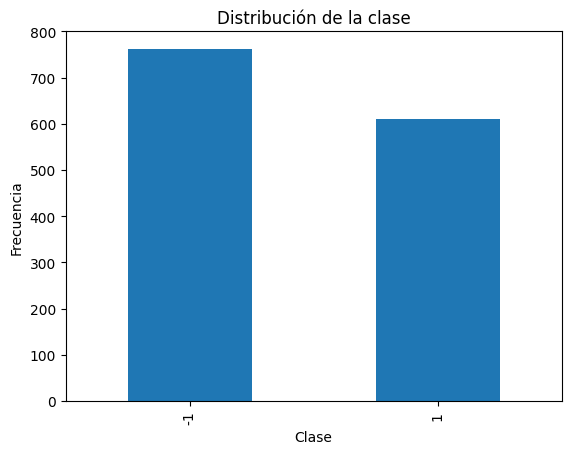

In [92]:
#Gráfico de barras para la columna "Clase"
billetes['Clase'].value_counts().plot(kind='bar')
plt.title('Distribución de la clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()


#sns.histplot(billetes, x='Entropia_WT', hue='Clase', kde=True)
#plt.title('Distribución de la Entropía por Clase')
#plt.show()

#varianza_wt = billetes['Varianza_WT'].sort_values()
#x = np.sort(varianza_wt)
#y = np.arange(1, len(x)+1) / len(x)
#plt.plot(x, y, marker='.', linestyle='none')
#plt.xlabel('Varianza_WT')
#plt.ylabel('Distribución empírica')
#plt.title('Curva de distribución empírica de Varianza_WT')
#plt.show()


A partir de esta variable es posible afirmar que existe una mayor cantidad de imágenes correspondientes a billetes falsos que a billetes genuinos dentro de la data.

*   **"Varianza_WT"**: Corresponde a la varianza de la imagen luego de aplicarse la transformada de Wavelet (continua). Mide qué tanto varía el registro frente a la distribución de los datos luego de trasnformarlos. 

  A continuación se tienen algunas métricas descriptivas para esta variable así como un histograma que indique su distribución:



In [93]:
billetes['Varianza_WT'].describe()
np.var(billetes['Varianza_WT'])

8.075408962235304

|           |Varianza_WT|
|-----------|-----------|
|N. Datos   |       1372|
|Min        |  -7.042100|
|Media      |   0.433735|
|Mediana    |   0.496180|
|Max        |   6.824800|
|D. estandar|   2.842763|
|Varianza   |   8.075409| 

array([[<Axes: title={'center': 'Varianza_WT'}>]], dtype=object)

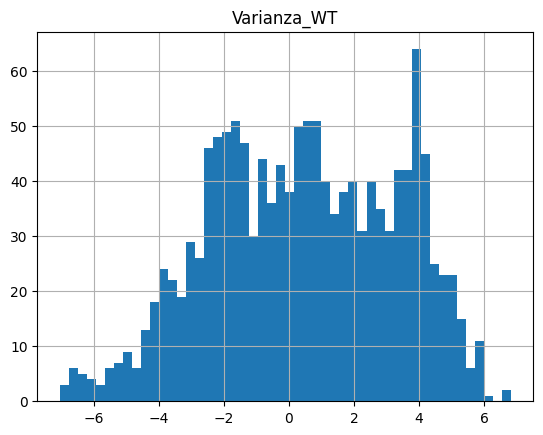

In [94]:
#Histograma para "Varianza_WT"
billetes.hist(column=['Varianza_WT'], bins=50)

Se puede notar que, dentro de esta variable, no existen registros NaN, así mismo, se tiene que existe una gran cantidad de datos con valores cercanos a 4 y que los datos tienden un poco hacia la derecha. 

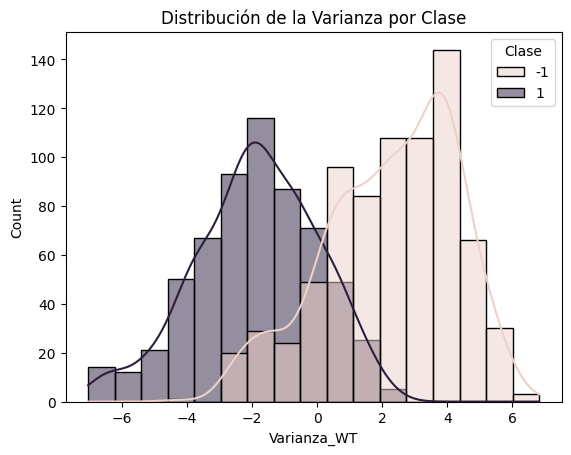

In [95]:
#Histograma para "Varianza_WT"
sns.histplot(billetes, x='Varianza_WT', hue='Clase', kde=True)
plt.title('Distribución de la Varianza por Clase')
plt.show()

  Revisando los datos por cada clase se nota que existe una diferencia importante respecto al comportamiento de la varianza entre los registros de billetes auténticos comparado con los registros de billetes falsos; esta diferencia muestra que, la varianza luego de la transformada Wavelet para los billetes genuinos tiende a tener valores inferiores que aquellos registros correspondientes a billetes falsos.

*   **"Asimetria_WT"**: Corresponde a la asimetría de la imagen luego de aplicarse la transformada de Wavelet (continua). Mide qué tan asimétrico es el registro frente a la distribución de los datos luego de transformarlos. Dentro de la data corresponde a una variable de tipo float.

  A continuación se tienen algunas métricas descriptivas para esta variable así como un histograma que indique su distribución:



In [96]:
billetes['Asimetria_WT'].describe()
np.var(billetes['Asimetria_WT'])

34.42060347729251

|           |Asimetria_WT|
|-----------|------------|
|N. Datos   |        1372|
|Min        |  -13.773100|
|Media      |    1.922353|
|Mediana    |    2.319650|
|Max        |   12.951600|
|D. estandar|    5.869047|
|Varianza   |   34.420603| 

array([[<Axes: title={'center': 'Asimetria_WT'}>]], dtype=object)

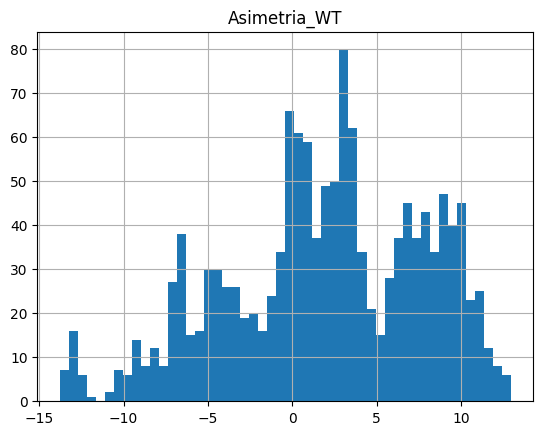

In [97]:
#Histograma para "Asimetria_WT"
billetes.hist(column=['Asimetria_WT'], bins=50)

 Se puede notar que, dentro de esta variable, no existen registros NaN, así mismo, se tiene aunque el valor mínimo es -13.773100, los datos se acumulan principalmente desde -10 aproximadamente. Dentro de este rango de valores, es posible observar diferentes picos, principalmente hacia los datos 0.5706 y 0.

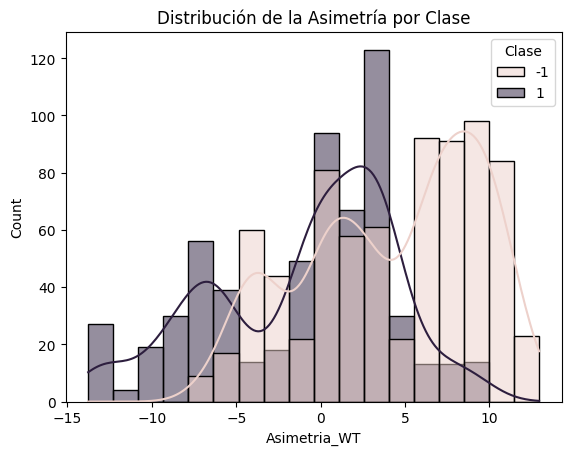

In [98]:
#Histograma de "Asimetría_WT" por "Clase"
sns.histplot(billetes, x='Asimetria_WT', hue='Clase', kde=True)
plt.title('Distribución de la Asimetría por Clase')
plt.show()

  Realizando el análisis por cada una de las clases se tiene que, existe una diferencia importante en los registros de la asimetría luego de realizar la transofmada Wavelet a las imágenes y que genera que los datos para los billetes falsos se ubiquen en una buena proporción después de 5 y que sean mayores respecto a los billetes genuinos los cuales tienen una cola notable hacia valores inferiores a -5.

*   **"Curtosis_WT"**: Indica la curtosis de la imagen luego de aplicarse la transformada de wavelet (continua). Mide el grado de concentración del dato respecto a la distribución luegode la transformada. Dentro de la data corresponde a una variable de tipo float.

  A continuación se tienen algunas métricas descriptivas para esta variable así como un histograma que indique su distribución:



In [99]:
billetes['Curtosis_WT'].describe()
np.var(billetes['Curtosis_WT'])

18.562819757086643

|           |Curtosis_WT|
|-----------|-----------|
|N. Datos   |       1372|
|Min        |  -5.286100|
|Media      |   1.397627|
|Mediana    |   0.616630|
|Max        |  17.927400|
|D. estandar|   4.310030|
|Varianza   |   18.56282|

array([[<Axes: title={'center': 'Curtosis_WT'}>]], dtype=object)

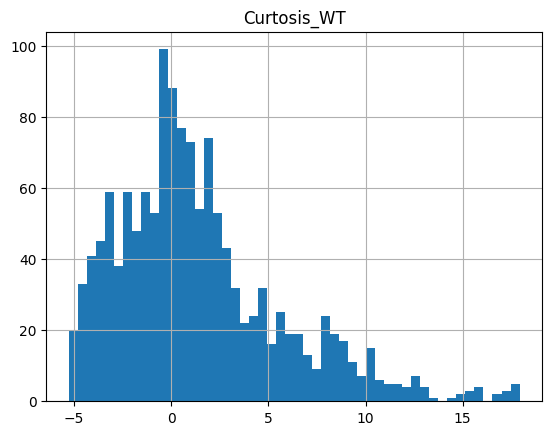

In [100]:
#Histograma para "Curtosis_WT"
billetes.hist(column=['Curtosis_WT'], bins=50)

  Se puede notar que, dentro de esta variable, no existen registros NaN, así mismo, se tiene los datos están fuertemente sesgados hacia la izquierda tomando valores principalmente entre -5 y 5. Sin embargo, se genera una cola a la derecha que se extiende hasta 17.9274.


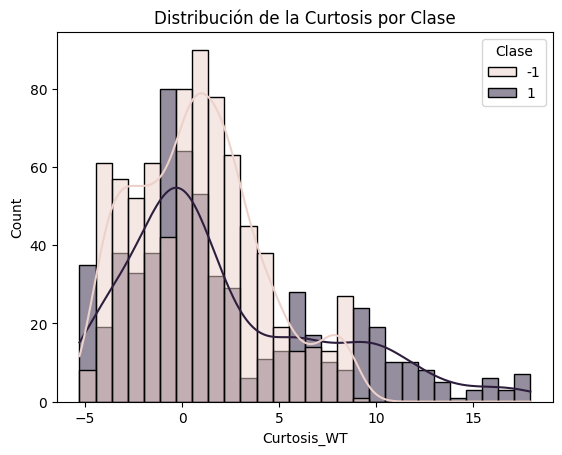

In [101]:
#Histograma de "Curtosis_WT" por "Clase"
sns.histplot(billetes, x='Curtosis_WT', hue='Clase', kde=True)
plt.title('Distribución de la Curtosis por Clase')
plt.show()

Realizando el análisis por cada una de las clases se observa que la cola derecha está generada principalmente por resultados provenientes de billetes auténticos. 

*   **"Entropia_WT"**: Correponde a la entropía de la imagen (continua). Mide la incertidumbre de la fuente de información; dentro de la data corresponde a una variable de tipo float.

  A continuación se tienen algunas métricas descriptivas para esta variable así como un histograma que indique su distribución:



In [102]:
billetes['Entropia_WT'].describe()
np.var(billetes['Entropia_WT'])

4.411038815454349

|           |Entropia_WT|
|-----------|-----------|
|N. Datos   |       1372|
|Min        |  -8.548200|
|Media      |  -1.191657|
|Mediana    |  -0.586650|
|Max        |   2.449500|
|D. estandar|   2.101013|
|Varianza   |   4.411039|


array([[<Axes: title={'center': 'Entropia_WT'}>]], dtype=object)

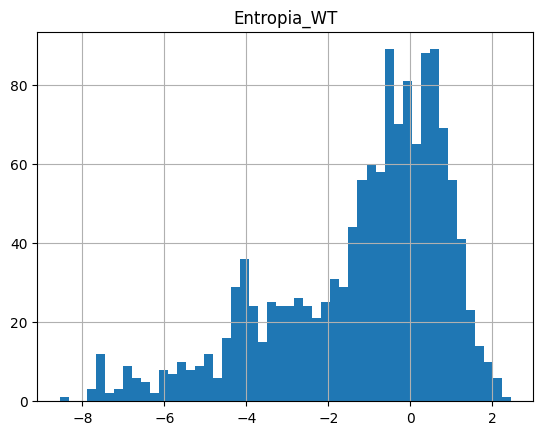

In [103]:
#Histograma para "Entropia_WT"
billetes.hist(column=['Entropia_WT'], bins=50)

  Se puede notar que, dentro de esta variable, no existen registros NaN, así mismo, se tiene que los registros se encuentran sesgados a la derecha tomando valores entre -2 y 2 principalmente. Así mismo, se observa una cola a la izquierda que se extiende hasta el registro mínimo de -8.5482.

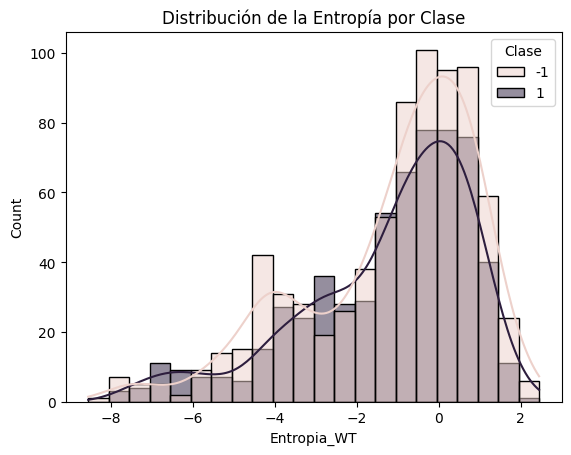

In [104]:
#Histograma de Entropia_WT por Clases
sns.histplot(billetes, x='Entropia_WT', hue='Clase', kde=True)
plt.title('Distribución de la Entropía por Clase')
plt.show()

# Gráfico de dispersión para las columnas "Varianza_WT" y "Entropia_WT"
#plt.scatter(billetes['Varianza_WT'], billetes['Entropia_WT'])
#plt.title('Dispersión de Varianza_WT vs Entropia_WT')
#plt.xlabel('Varianza_WT')
#plt.ylabel('Entropia_WT')
#plt.show()



Realizando el análisis por cada una de las clases se observa que, hay unos ligeros cambios en la masa para valores principalmente entre -2 y 2 así como en -4. Estos debidos posiblemente a la cantidad de registros que hay por cada clase.

A continuación se deja una tabla que resume algunas estadísticas de las variables cuantitativas agrupadas por cada clase. 






  





In [105]:
# Estadísticas descriptivas por clase
#print(billetes.groupby('Clase')['Varianza_WT'].describe())
billetes.groupby('Clase')['Varianza_WT'].apply(np.var)
billetes.groupby('Clase')['Varianza_WT'].apply(skew)
billetes.groupby('Clase')['Varianza_WT'].apply(kurtosis)
#print(billetes.groupby('Clase')['Asimetria_WT'].describe())
billetes.groupby('Clase')['Asimetria_WT'].apply(np.var)
billetes.groupby('Clase')['Asimetria_WT'].apply(skew)
billetes.groupby('Clase')['Asimetria_WT'].apply(kurtosis)
#print(billetes.groupby('Clase')['Curtosis_WT'].describe())
billetes.groupby('Clase')['Curtosis_WT'].apply(np.var)
billetes.groupby('Clase')['Curtosis_WT'].apply(skew)
billetes.groupby('Clase')['Curtosis_WT'].apply(kurtosis)
#print(billetes.groupby('Clase')['Entropia_WT'].describe())
billetes.groupby('Clase')['Entropia_WT'].apply(np.var)
billetes.groupby('Clase')['Entropia_WT'].apply(skew)
billetes.groupby('Clase')['Entropia_WT'].apply(kurtosis)

Clase
-1    0.413815
 1    0.596764
Name: Entropia_WT, dtype: float64

|   |    | # Datos | Min      | Media     | Mediana  | Max     | D. Estandar | Varianza  | Skewness  | Curtosis  |
|---|----|---------|----------|-----------|----------|---------|-------------|-----------|-----------|-----------|
|   | -1 | 762     | -4.2859  | 2.276686  | 2.5531   | 6.8248  | 2.019348    | 4.072416  | -0.491571 | -0.361150 |
|   | 1  | 610     | -7.0421  | -1.868443 | -1.8061  | 2.3917  | 1.881183    | 3.533047  | -0.300938 | -0.183951 |
|   | -1 | 762     | -6.9321  | 4.256627  | 5.668800 | 12.9516 | 5.138792    | 26.372529 | -0.379434 | -1.040622 |
|   | 1  | 610     | -13.7731 | -0.993576 | 0.172775 | 9.6014  | 5.404884    | 29.164879 | -0.516072 | -0.535194 |
|   | -1 | 762     | -4.9417  | 0.796718  | 0.700605 | 8.8294  | 3.239894    | 10.483136 | 0.428928  | -0.335026 |
|   | 1  | 610     | -5.2861  | 2.148271  | 0.373720 | 17.9274 | 5.261811    | 27.641266 | 0.953895  | 0.196252  |
|   | -1 | 762     | -8.5482  | -1.147640 | -0.55238 | 2.4495  | 2.125077    | 4.510025  | -0.998025 | 0.413815  |
|   | 1  | 610     | -7.5887  | -1.246641 | -0.66165 | 2.1353  | 2.070984    | 4.281943  | -1.057938 | 0.596764  |

Ahora, se va a observar el comportamiento entre cada par de variables para el conjunto de datos separado por clases.

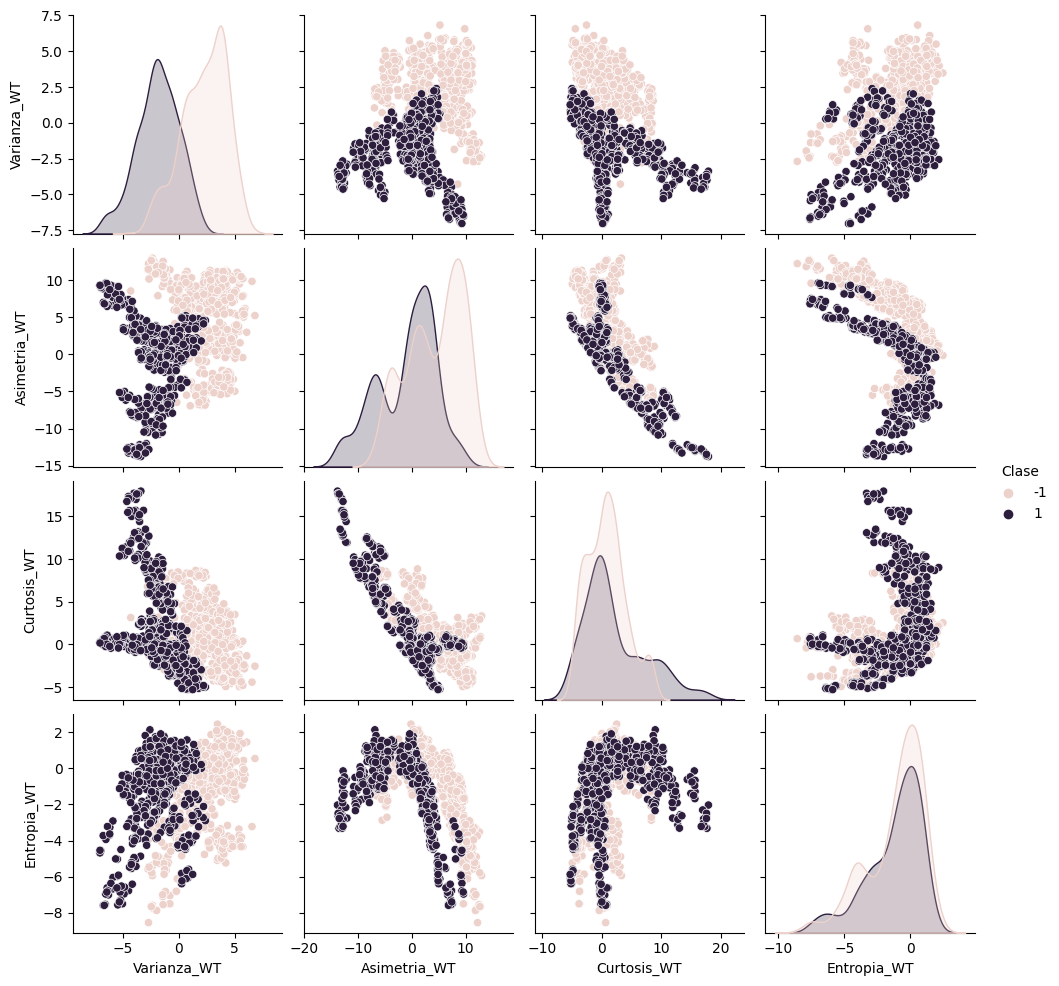

In [106]:
#billetes.corr()
#sns.pairplot(billetes)
variables = ["Varianza_WT", "Asimetria_WT", "Curtosis_WT", "Entropia_WT"]
#correlacion_por_clase = billees[variables].groupby(billetes['Clase']).corr()
#print(correlacion_por_clase)
sns.pairplot(data=billetes, hue="Clase")

De este comportamiento es posible observar que existen variables donde los comportamientos por clase se sobreponen como lo pueden ser "Curtosis_WT" y "Entropia_WT". Sin embargo, también es posible notar que existen diferencias impotantes para la separación por clases entre variables como "Varianza_WT" y "Asimetria_WT" o "Varianza_WT" y "Curtosis_WT".

Ya que se cuenta solo con un conjunto de datos, para realizar el ejercicio se va a dividir en 2 muestras aleatorias que servirán como muestra de entrenamiento y validación.
Para la data de entrenamiento se extraen dos objetos, uno con las variables para el ajuste del modelo y el otro con las etiquetas.

In [107]:
random. seed(0) 
mascara=np.random.rand(len(billetes)) < 0.8
billetes_train=billetes[mascara]
billetes_test=billetes[~mascara]

billetes_train_variables=billetes_train[["Varianza_WT","Asimetria_WT","Curtosis_WT","Entropia_WT"]]
billetes_train_clase=billetes_train[["Clase"]]
billetes_test_variables=billetes_test[["Varianza_WT","Asimetria_WT","Curtosis_WT","Entropia_WT"]]
billetes_test_clase=billetes_test[["Clase"]]

A continuación, se describirá el código inicial facilitado para la realización del ejercicio. Un primer paso es construir la clase "SVM" la cual tendrá las características comunes de este algoritmo.

In [108]:
class Support_Vector_Machine:                                                   #Se crea la clase (sección) SVM. Esta técnica de aprendizaje procura encontrar el mejor hiperplano para separar las etiquetas.
                                                                                #La clase contiene los métodos para ajustar el modelo a los datos y predecir el resultado de la clasificación.
    
    #Se crea el método __init__ el cual cuenta con los atributos (parámetros) de visualización y color, siempre va en una clase debido a que este inicializa los parámeros.
    #"self" representa la instancia de la clase 
    #En el caso del parámetro booleano "visualization" indica si se mostrarán visualmente los resultados de la clasificación de datos.
    def __init__(self, visualization=True):                                     #El método(función dentro de una clase) __init__ establece un estado inicial de la clase, es decir, inicializar los atributos. "visualization" se usa para determinar si se mostrarán visualmente los resultados de la clasificación de datos. 
        self.visualization = visualization                                      #El comando "self.visualization" crea el atributo visualization y lo inicia con el valor de la variable "visualization"
        #El comando "self" permite ingresar a los atributos y métodos de la clase, en este caso indica parámetros de visualización
        self.colors = {1:'r',-1:'b'}                                            #Indica parámetros de colores para las clases 1 y -1.
        if self.visualization:                                                  #Si está habilitado el permitir la visualización se generan los parámetros para la gráfica
            self.fig = plt.figure()                                             #Crea una nueva figura
            self.ax = self.fig.add_subplot(1,1,1)                               #Agrega una "subfigura" a la figura anterior, para ello indica su ubicación por medio de filas, columnas y el índice de la subfigura.

    # train                                                                     #Entrenamiento
    def fit(self, data):                                                        #El comando fit ajusta el modelo a los datos de entrenamiento
        self.data = data                                                        #Indica los datos para el conjunto de entrenamiento. #El parámetro 'data' es un diccionario que contiene arrays numpy para cada clase.
        # { ||w||: [w,b] }                                                      #Calcula la norma de w
        opt_dict = {}                                                           #Crea un diccionario vacío que luego se usará para almacenar los valores de 'w' y 'b' que serían óptimos para el modelo.

#Se construye una lista con "vectores" que indican las posibles transformaciones que podrían ser aplicadas a los vectores de soporte y que ayudan a verificar cómo el hiperplano estaría separando los datos.
# Originalmente el código incluye las siguientes transformaciones basadas en un caso de data con los vectores de características x en R^2
        transforms = [[1,1],                                                    #
                      [-1,1],                                                   #
                      [-1,-1],                                                  #
                      [1,-1]]                                                   #
#Ya que el ejercicio con la data billetes cuenta con 4 variables o características, se realiza un ajuste a dicha lista de manera que se obtengan transformaciones basadas en los vectores de características en R^4
        transforms = [[1,1,1,1],
                      [1,1,1,-1],
                      [1,1,-1,1],
                      [1,1,-1,-1],
                      [1,-1,1,1],
                      [1,-1,1,-1],
                      [1,-1,-1,1],
                      [1,-1,-1,-1],
                      [-1,1,1,1],
                      [-1,1,1,-1],
                      [-1,1,-1,1],
                      [-1,1,-1,-1],
                      [-1,-1,1,1],
                      [-1,-1,1,-1],
                      [-1,-1,-1,1],
                      [-1,-1,-1,-1]]

        all_data = []                                                           # Se construye una lista vacía que luego se usaría para almacenar la data con todas las instancias de todas las clases. Esto para poder ordenar y hallar máximos y mínimos en la normalización.
        for yi in self.data:                                                    #Recorre las etiquetas
            for featureset in self.data[yi]:                                    #Recorre los vectores de características
                for feature in featureset:                                      #Recorre y pega las características una bajo otra
                    all_data.append(feature)                                    

        self.max_feature_value = max(all_data)                                  #Extrae el valor máximo de la data
        self.min_feature_value = min(all_data)                                  #Extrae el valor mínimo de la data
        all_data = None                                                         #

        # support vectors yi(xi.w+b) = 1                                        #
        

        step_sizes = [self.max_feature_value * 0.1,                             #Indica el tamaño de los pasos para la estimación de los parámetros (Mira si converge)
                      self.max_feature_value * 0.01,                            #
                      # point of expense:
                      self.max_feature_value * 0.001,]                          #

        
        
        # extremely expensive
        b_range_multiple = 2                                                    #
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5                                                          #
        latest_optimum = self.max_feature_value*10                              #
        
#para el siguiente for cada valor en esta lista representa el tamaño del paso que se utilizará para actualizar el vector de pesos w durante la optimización
#tomando el 0.1,0.01 y 0.001 que mencionamos anteriormente en el step_sizes
        for step in step_sizes:                                                 # Recorre cada uno de los tamaños de los pasos definidos anteriormnte
            w = np.array([latest_optimum,latest_optimum])                       # El vector de pesos w se inicia con valores considerados los más óptimos.
            #Para el ejercicio las 4 características de la data billetes se modifica el vector de pesos w
            w = np.array([latest_optimum,latest_optimum,latest_optimum,latest_optimum]) 
            
            # we can do this because convex
            optimized = False                                                   #
            while not optimized:                                                #
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),# 
                                   self.max_feature_value*b_range_multiple,     #
                                   step*b_multiple):                            #
                    for transformation in transforms:                           #
                        w_t = w*transformation                                  # Se construye el vector w_t a partir de la lista de transformaciones que se tenía anteriormente y el vector de pesos w
                        found_option = True                                     # Indica si se ha encontrado una transformación válida para el vector w_t
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:                                     #
                            for xi in self.data[i]:                             #
                                yi=i                                            #
                                if not yi*(np.dot(w_t,xi)+b) >= 1:              #Se calcula el producto punto entre el vector w_t y el x_i.
                                    found_option = False                        #
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))     
                                    
                        if found_option:                                        #
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]             # Calcula la norma del vector w_t

                if w[0] < 0:                                                    # Se verifica si el primer elemento del vector de pesos w es menor que cero
                    optimized = True                                            # Indica que se ha optimizado el proceso
                    print('Optimized a step.')                                  #
                else:                                                           #
                    w = w - step                                                # Se continúa el proceso de optimización restando el valor del paso al vector w

            print(opt_dict)                                                     #Imprime el contenido del diccionario opt_dict
            norms = sorted([n for n in opt_dict])                               #Se crea la lista norms con orden ascendente y que contiene los valores del diccionario opt_dict
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]                                     #Accede al menor valor de las normas encontradas y almacenadas en la lista norms
            self.w = opt_choice[0]                                              #Se asigna el menor valor de las normas a self.w
            self.b = opt_choice[1]                                              #Se asigna el segundo menor valor de las normas a self.b (sesgo)
            latest_optimum = opt_choice[0][0]+step*2                            #Se calcula el último valor óptimo a partir del menor valor de las normas y el tamaño del paso que se está considerando
            
        for i in self.data:                                                     #Recorre el diccionario self.data
            for xi in self.data[i]:                                             #Recorre la entrada i del diccionario self.data, esto es la i-ésima variable.
                yi=i                                                            #Asigna el valor i que se está recorriendo a la variable y_i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))                     #Imprime el valor de la entrada y su correspondiente valor o resultado.

    def predict(self,features):                                                 #Definimos la función "predict" que dependerá del argumento "features" correspondiente a las características que se tengan en la data
        # sign( x.w+b ) 
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)      # se calcula el producto punto entre el vector de características y el vector de pesos, luego se suma el vector del sesgo y se obtiene el signo de dicha operación.
        if classification !=0 and self.visualization:                           #Verifica los casos en que en que se realizó clasificación (Cálculo anterior) y se realiza una visualización de dicha clasificación
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification]) 
        return classification                                                   #

########     

Optimized a step.
{180.0: [array([ 90, -90,  90, -90]), 13.5], 178.2: [array([ 89.1, -89.1,  89.1, -89.1]), 13.5], 176.39999999999998: [array([ 88.2, -88.2,  88.2, -88.2]), 13.5], 174.59999999999997: [array([ 87.3, -87.3,  87.3, -87.3]), 13.5], 172.79999999999995: [array([ 86.4, -86.4,  86.4, -86.4]), 13.5], 170.99999999999994: [array([ 85.5, -85.5,  85.5, -85.5]), 13.5], 169.19999999999993: [array([ 84.6, -84.6,  84.6, -84.6]), 13.5], 167.39999999999992: [array([ 83.7, -83.7,  83.7, -83.7]), 13.5], 165.5999999999999: [array([ 82.8, -82.8,  82.8, -82.8]), 13.5], 163.7999999999999: [array([ 81.9, -81.9,  81.9, -81.9]), 13.5], 161.9999999999999: [array([ 81., -81.,  81., -81.]), 13.5], 160.19999999999987: [array([ 80.1, -80.1,  80.1, -80.1]), 13.5], 158.39999999999986: [array([ 79.2, -79.2,  79.2, -79.2]), 13.5], 156.59999999999985: [array([ 78.3, -78.3,  78.3, -78.3]), 13.5], 154.79999999999984: [array([ 77.4, -77.4,  77.4, -77.4]), 13.5], 152.99999999999983: [array([ 76.5, -76.5,  76.5

1.0

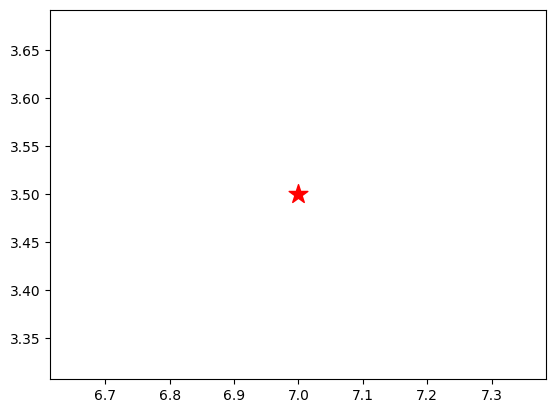

In [109]:
data_dict = {-1:np.array([[1,7,2,2],
                          [2,8,4,5],
                          [3,8,7,8],]),
             
             1:np.array([[5,1,3,6],
                         [6,-1,8,2],
                         [7,3,9,2],])}

svm1 = Support_Vector_Machine()
svm1.fit(data_dict)

svm1.predict([7,3.5,2,5])


A continuación aplicamos algunos métodos como el SVM, regresión lineal y logística a nuestro conjunto de datos.  

**SVM**

Para este modelo o técnica se considerará como metidad de ajuste el "accuracy" debido a que nos brinda la presición del modelo teniendo en cuenta tanto el total de aciertos como de fallos bien sea falsos o ciertos.

In [110]:
svm_model = SVC(kernel='linear')
svm_model.fit(billetes_train_variables, billetes_train_clase)
y_pred = svm_model.predict(billetes_test_variables)

presicion = accuracy_score(billetes_test_clase, y_pred)
print('La precisión del modelo SVM ajustado a los datos es', presicion)

La precisión del modelo SVM ajustado a los datos es 0.9888888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Regresión lineal**

Para esto se considerará como metidad de ajuste el "MSE" mide el promedio de los errores cuadráticos entre las predicciones y los valores reales.

In [111]:
reg_model = LinearRegression()
reg_model.fit(billetes_train_variables, billetes_train_clase)
y_pred = reg_model.predict(billetes_test_variables)

MSE = mean_squared_error(billetes_test_clase, y_pred)
print('El error cuadrático medio del modelo de regresión lineal ajustado a los datos es', MSE)

El error cuadrático medio del modelo de regresión lineal ajustado a los datos es 0.1427784051514055


**Regresión logística**

Para este modelo o técnica se considerará como metidad de ajuste el "accuracy" debido a que nos brinda la presición del modelo teniendo en cuenta tanto el total de aciertos como de fallos bien sea falsos o ciertos.

In [112]:
logreg_model = LogisticRegression()
logreg_model.fit(billetes_train_variables, billetes_train_clase)
y_pred = logreg_model.predict(billetes_test_variables)

accuracy = accuracy_score(billetes_test_clase, y_pred)
print('La precisión del modelo de regresión logística ajustado a los datos es', accuracy)

La precisión del modelo de regresión logística ajustado a los datos es 0.9925925925925926


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Vecinos más cercanos**

Para este modelo o técnica se realizará el ajuste a partir de 7 'vecinos cercanos', además se considerará como metidad de ajuste el "accuracy" debido a que nos brinda la presición del modelo teniendo en cuenta tanto el total de aciertos como de fallos bien sea falsos o ciertos.

In [113]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(billetes_train_variables, billetes_train_clase)
y_pred = knn_model.predict(billetes_test_variables)

accuracy = accuracy_score(billetes_test_clase, y_pred)
print('La precisión del modelo de vecino más cercano ajustado a los datos es', accuracy)

La precisión del modelo de vecino más cercano ajustado a los datos es 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Árboles de decisión**

Para este modelo o técnica se considerará como metidad de ajuste el "accuracy" debido a que nos brinda la presición del modelo teniendo en cuenta tanto el total de aciertos como de fallos bien sea falsos o ciertos.

In [114]:
tree_model = DecisionTreeClassifier()
tree_model.fit(billetes_train_variables, billetes_train_clase)
y_pred = tree_model.predict(billetes_test_variables)

accuracy = accuracy_score(billetes_test_clase, y_pred)
print('La precisión del modelo de árboles de decisión ajustado a los datos es', accuracy)

La precisión del modelo de árboles de decisión ajustado a los datos es 0.9851851851851852


3. 
* **¿Son linealmente separables los datos?:** Como se mostró anteriormente de manera gráfica, en un principio podría creerse que no se pueden separar debido a la superposición de los 'puntos'. Sin embargo, a partir del método SVM es posible encontrar los valores del hiperplano que separa dichos puntos.

* **¿Los datos son tomados de manera aleatoria?:** En el momento con los registros que se cuentan no sería posible determinar a ciencia cierta si estos fueron o no tomados de manera aleatoria ya que depende del diseño experimental con el que se contó para obtener cada uno de los registros. Sin embargo, según las estadísticas que se lograron obtener se podría suponer que estos si fueron tomados aleatoriamente al no evidenciar un sesgo notorio hacia cierto valor o clasificación.

* **¿La muestra es suficiente para generalización?:** A partir de los resultados de los diferentes modelos es posible observar que existe un buen desempeño dentro de los modelos frente a los resultados de generalización aún cuando la cantidad de datos apriori puede parecer no ser lo suficientemente grande. Acá también cabe resaltar que entre más datos se tenga es mayor el costo computacional que se tiene y que aún así los resultados de los ajustes son significativamente buenos como se resume a continuación:

|        |SVM   |R. Lineal|R.Logística|Vecinos cercanos|Árbol decisión|
|--------|------|---------|-----------|----------------|--------------|
|Accuracy|0.9884|         |0.9884     |1.0             |0.9884        |
|MSE     |      |0.1544   |           |                |              |  



# DATA SET 2 (Ocupación de habitación)

**DATA SET 2:**
Tomada de la web "Machine Learning Repository". https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+


1.   El ejercicio de aprendizaje automático para este dataset consiste en indicar si una habitación se encuentra ocupada o no a partir de características que arroja el ambiente dentro de la misma. 

In [115]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
import random
from scipy.stats import kurtosis

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from google.colab import drive
drive.mount('/content/drive')
#Data para el entrenamiento y ajuste del modelo
ocupacion_training = pd.read_csv('/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Taller 1/data_ocupacion/datatraining_room.txt', sep=',')
ocupacion_training.loc[ocupacion_training['Occupancy'] <1, 'Occupancy'] = -1                                #Renombramos la etiqueta 0 con -1
ocupacion_training
num_registros1, num_variables1=ocupacion_training.shape
print(ocupacion_training.shape)

#Data para validación del entrenamiento
ocupacion_test1 = pd.read_csv('/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Taller 1/data_ocupacion/datatest_room.txt', sep=',')
ocupacion_test1.loc[ocupacion_test1['Occupancy'] <1, 'Occupancy'] = -1                                #Renombramos la etiqueta 0 con -1
ocupacion_test1
num_registros2, num_variables2=ocupacion_test1.shape
print(ocupacion_test1.shape)

#Data para test del modelo
ocupacion_test2 = pd.read_csv('/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Taller 1/data_ocupacion/datatest2_room.txt', sep=',')
ocupacion_test2.loc[ocupacion_test2['Occupancy'] <1, 'Occupancy'] = -1                                #Renombramos la etiqueta 0 con -1
ocupacion_test2
num_registros3, num_variables3=ocupacion_test2.shape
print(ocupacion_test2.shape)
num_registros1+num_registros2+num_registros3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(8143, 7)
(2665, 7)
(9752, 7)


20560

2.   Esta data corresponde a datos experimentales utilizados para la clasificación binaria (ocupación de la habitación) a partir de la temperatura, humedad, luz y CO2. La "ocupación real" del suelo se obtuvo a partir de imágenes con etiquetado de tiempo que se tomaron cada minuto. Para este ejercicio se contemplaron 3 conjuntos de datos, para entrenamiento y prueba. 

In [116]:
#Análisis descriptivo de la data
print(f"El dataset 'ocupacion_training' cuenta con {num_registros1+num_registros2+num_registros3} registros y {num_variables1} variables.")
print(f"El dataset 'ocupacion_training' cuenta con las variables {ocupacion_training.columns.tolist()}")

El dataset 'ocupacion_training' cuenta con 20560 registros y 7 variables.
El dataset 'ocupacion_training' cuenta con las variables ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']


Esta data cuenta con 20560 registros, cada uno con 7 variables o características. De estas, 5 corresponden a datos cuantitativos, 1 corresponde al instante en que se realizó la toma del registro y la variable restante corresponde a una variable cualitativa o factor.

Estos 20560 registros son el consolidado de los tres conjuntos de datos. Sin embargo, el ajuste se realizará solo con los 8143 correspondientes al conjunto de entrenamiento. 

Las variables son:

*   **Occupacy (Etiqueta):** Corresponde al indicador de ocupación de la habitación. Se usa 1 para indicar que la habitación estaba ocupada y 0 para indicar que no estaba ocupada.


In [117]:
ocupacion_training

date  Temperature  Humidity  Light         CO2  \
1     2015-02-04 17:51:00        23.18   27.2720  426.0  721.250000   
2     2015-02-04 17:51:59        23.15   27.2675  429.5  714.000000   
3     2015-02-04 17:53:00        23.15   27.2450  426.0  713.500000   
4     2015-02-04 17:54:00        23.15   27.2000  426.0  708.250000   
5     2015-02-04 17:55:00        23.10   27.2000  426.0  704.500000   
...                   ...          ...       ...    ...         ...   
8139  2015-02-10 09:29:00        21.05   36.0975  433.0  787.250000   
8140  2015-02-10 09:29:59        21.05   35.9950  433.0  789.500000   
8141  2015-02-10 09:30:59        21.10   36.0950  433.0  798.500000   
8142  2015-02-10 09:32:00        21.10   36.2600  433.0  820.333333   
8143  2015-02-10 09:33:00        21.10   36.2000  447.0  821.000000   

      HumidityRatio  Occupancy  
1          0.004793          1  
2          0.004783          1  
3          0.004779          1  
4          0.004772          1  
5          0.004757          1  
...             ...        ...  
8139       0.005579          1  
8140       0.005563          1  
8141       0.005596          1  
8142       0.005621          1  
8143       0.005612          1  

[8143 rows x 7 columns]

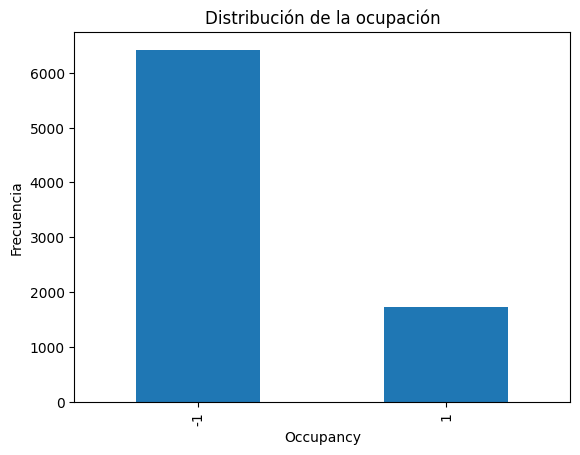

In [118]:
#Gráfico de barras para la columna "Occupancy"
ocupacion_training['Occupancy'].value_counts().plot(kind='bar')
plt.title('Distribución de la ocupación')
plt.xlabel('Occupancy')
plt.ylabel('Frecuencia')
plt.show()


A partir de esta variable es posible afirmar que existe una mayor cantidad de registros correspondientes a instantes sin ocupación en la habitación dentro de la data.

* **Temperature:** Corresponde a la temperatura en grados Celsius de la habitación en el momento del registro.

A continuación se tienen algunas métricas descriptivas para esta variable así como un histograma que indique su distribución:

In [119]:
ocupacion_training['Temperature'].describe()
#np.var(ocupacion_training['Temperature'])

count    8143.000000
mean       20.619084
std         1.016916
min        19.000000
25%        19.700000
50%        20.390000
75%        21.390000
max        23.180000
Name: Temperature, dtype: float64

|           |Temperature|
|-----------|-----------|
|N. Datos   |       8143|
|Min        |  19.000000|
|Media      |  20.619084|
|Mediana    |   20.39000|
|Max        |   23.39000|
|D. estandar|   1.016916|
|Varianza   |   1.033992| 

array([[<Axes: title={'center': 'Temperature'}>]], dtype=object)

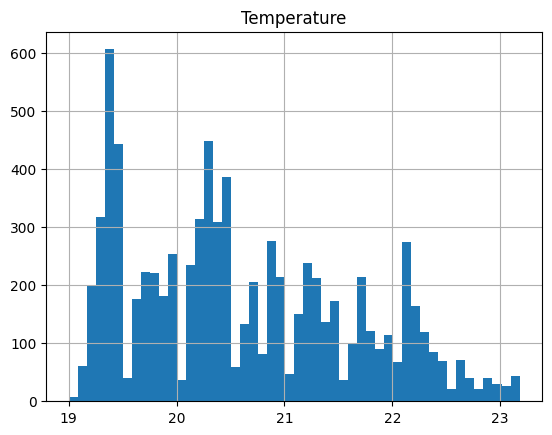

In [120]:
#Histograma para "Temperature"
ocupacion_training.hist(column=['Temperature'], bins=50)

Se puede notar que, dentro de esta variable, no existen registros NaN, así mismo, se tiene que los datos no presentan una homogeneidad en los registros de la data. Sin embargo, si hay algunos picos notables en valores cercanos a los 19.4°C, 20.33°C, 20.5°C, 20.91°C y 22.16°C.


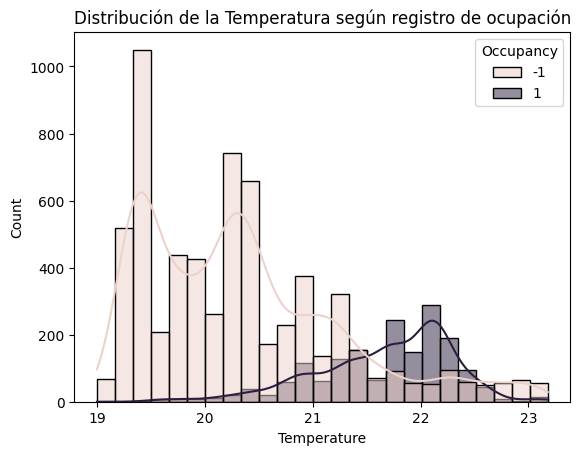

In [121]:
#Histograma para "Temperature"
sns.histplot(ocupacion_training, x='Temperature', hue='Occupancy', kde=True)
plt.title('Distribución de la Temperatura según registro de ocupación')
plt.show()

  Revisando los datos por cada 'etiqueta', se nota que existe una diferencia importante respecto al comportamiento de la temperatura entre los registros de instantes en los que la habitación estaba ocupada comparado con los registros en los que no estaba ocupada; esta diferencia muestra que, la temperatura del lugar tiende a tener valores inferiores cuando la habitación está sola.


*   **Humidity:** Representa el porcentaje de humedad relativa de la habitación. Esto es, la relación entre la presión parcial del vapor de agua y la presión de vapor de equilibrio del agua a una temperatura dada. La humedad relativa depende de la temperatura y la presión del sistema de interés.



In [122]:
ocupacion_training['Humidity'].describe()
#np.var(ocupacion_training['Humidity'])

count    8143.000000
mean       25.731507
std         5.531211
min        16.745000
25%        20.200000
50%        26.222500
75%        30.533333
max        39.117500
Name: Humidity, dtype: float64

|           |   Humidity|
|-----------|-----------|
|N. Datos   |       8143|
|Min        |  16.745000|
|Media      |  25.731507|
|Mediana    |   26.22250|
|Max        |   39.11750|
|D. estandar|   5.531211|
|Varianza   |  30.590538| 

array([[<Axes: title={'center': 'Humidity'}>]], dtype=object)

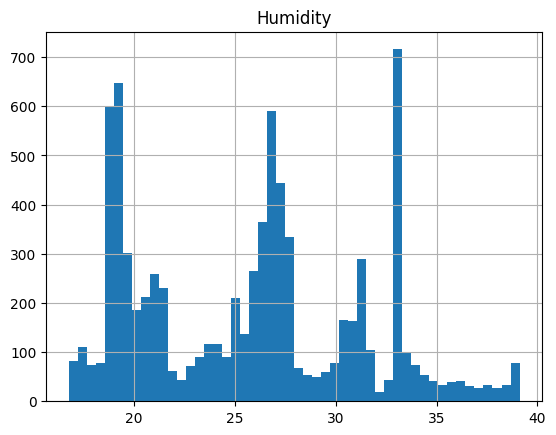

In [123]:
#Histograma para "Humidity"
from scipy.stats import mode
ocupacion_training.hist(column=['Humidity'], bins=50)
#humidity_mode=mode(ocupacion_training['Humidity'])
#humidity_counts = ocupacion_training['Humidity'].value_counts()
#humidity_counts.head(5)

 Se puede notar que, dentro de esta variable, no existen registros NaN, así mismo, se tiene aunque el valor mínimo es 16.745, los datos se acumulan principalmente en tres regiones o secciones. Dentro de este rango de valores, es posible observar diferentes picos, principalmente hacia los datos 33, 18.7 y 26.7

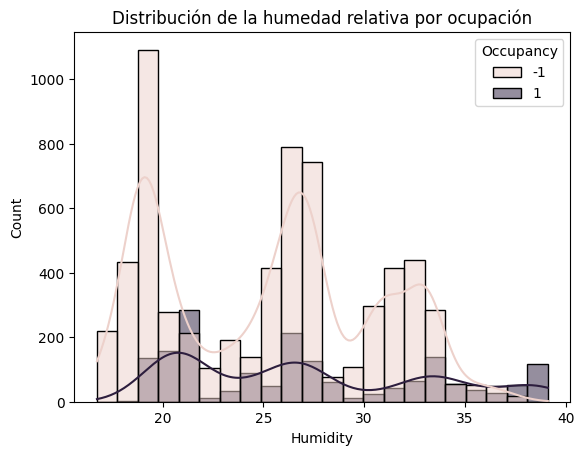

In [124]:
#Histograma de "Humidity" por "Occupancy"
sns.histplot(ocupacion_training, x='Humidity', hue='Occupancy', kde=True)
plt.title('Distribución de la humedad relativa por ocupación')
plt.show()

Realizando el análisis por cada una de las clases se tiene que, existe una diferencia importante en los registros de la humedad y que muestra que esta aumenta notablemente cuando la habitación está vacía. 

*   **Light:** Indica la intensidad luz en la habitación en el momento de cada registro. Se mide en pies o lux, y es la cantidad de luz (lúmenes) que cae sobre una superficie (sobre cualquier pie cuadrado o metro cuadrado).


In [125]:
ocupacion_training['Light'].describe()
np.var(ocupacion_training['Light'])

37925.16553597674

|           |      Light|
|-----------|-----------|
|N. Datos   |       8143|
|Min        |    0.00000|
|Media      | 119.519375|
|Mediana    |    0.00000|
|Max        |1546.333333|
|D. estandar| 194.755805|
|Varianza   |37925.16553| 

0.0      5160
433.0     230
444.0     108
454.0      86
438.0      73
Name: Light, dtype: int64

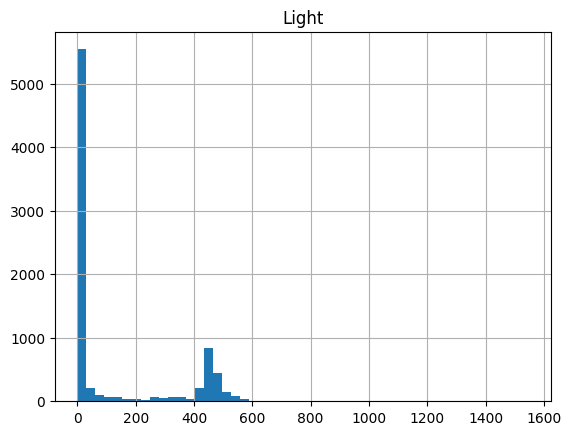

In [126]:
#Histograma para "Light"
ocupacion_training.hist(column=['Light'], bins=50)
#light_mode=mode(ocupacion_training['Light'])
light_counts = ocupacion_training['Light'].value_counts()
light_counts.head(5)

Se puede notar que en esta variable predomina el registro donde no hay intensidad de luz sobre todos los demás datos con diferencias muy importantes. Existe una cola larga a la derecha que llega hasta el valor máximo de 1543 aproximadamente pero cuya frecuencia es casi nula. También es posible observar una pequeña masa de registros que oscilan entre los 400 lux y 600 lux, con un pequeño pico cerca de los 433 lux.

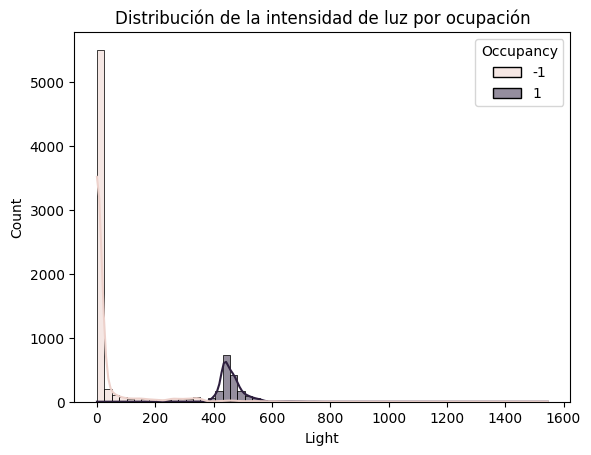

In [127]:
#Histograma de "Light" por "Occupancy"
sns.histplot(ocupacion_training, x='Light', hue='Occupancy', kde=True)
plt.title('Distribución de la intensidad de luz por ocupación')
plt.show()

En este análisis se puede observar cláramente el cómo el registo de intensidad de luz difiere fuertemente entre instantes con ocupación en la habitación respecto a aquellos en los que no. Adicionalmente, es coherente frente a las primeras conclusiones en las que se mencionaba que gran parte de los registros de la data correspondían a instantes en los que la habitación se encontraba desocupada.

*   **CO2:** Indica la cantidad de CO2 de la habitación medido en ppm. A priori y según los registros anteriores se podría esperar que estos registros sean mayores en los instantes en que la habitación se encuentra ocupada.



In [128]:
ocupacion_training['CO2'].describe()
#np.var(ocupacion_training['CO2'])

count    8143.000000
mean      606.546243
std       314.320877
min       412.750000
25%       439.000000
50%       453.500000
75%       638.833333
max      2028.500000
Name: CO2, dtype: float64

|           |        CO2|
|-----------|-----------|
|N. Datos   |       8143|
|Min        |   412.7500|
|Media      | 606.546243|
|Mediana    |    453.500|
|Max        |   2028.500|
|D. estandar| 314.320877|
|Varianza   |98785.48081| 

439.0    132
437.0    127
438.0    125
435.0    119
441.0    117
Name: CO2, dtype: int64

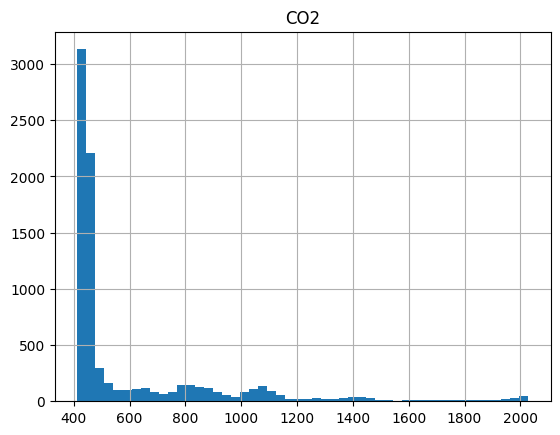

In [129]:
#Histograma para "CO2"
ocupacion_training.hist(column=['CO2'], bins=50)
#light_mode=mode(ocupacion_training['Light'])
CO2_counts = ocupacion_training['CO2'].value_counts()
CO2_counts.head(5)

Se puede observar que, de manera similar a la variable "Light", existe una gran cantida de registros correspondientes al valor mínimo, una cola larga hacia la derecha pero con una frecuencia notablemente inferior respecto a los valores mínimos registrados.

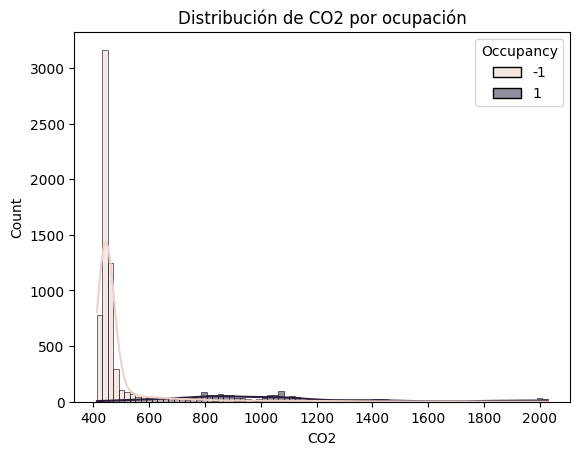

In [130]:
#Histograma de "CO2" por "Occupancy"
sns.histplot(ocupacion_training, x='CO2', hue='Occupancy', kde=True)
plt.title('Distribución de CO2 por ocupación')
plt.show()

En este punto es posible observar que contrario a lo esperado, los registros correspondientes a instantes en los que la habitación se encontraba ocupada son aquellos con menores registros de CO2.

*   **HumidityRatio:** Indica la relación de humedad de la habitación, es una cantidad derivada de la temperatura y la humedad relativa medida enkgagua-vapor/kg-aire.


In [131]:
ocupacion_training['HumidityRatio'].describe()
np.var(ocupacion_training['HumidityRatio'])

7.263794296167885e-07

|           |HumidityRatio|
|-----------|-------------|
|N. Datos   |         8143|
|Min        |     0.002674|
|Media      |     0.003863|
|Mediana    |     0.003801|
|Max        |     0.006476|
|D. estandar|     0.000852|
|Varianza   |     7.263794| 

<ipython-input-132-72276710ec6a>:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  light_mode=mode(ocupacion_training['HumidityRatio'])


0.004846    87
0.003713    66
0.004861    66
0.002746    65
0.002744    62
0.003783    53
0.004819    52
0.002696    51
0.003865    48
0.002705    41
Name: HumidityRatio, dtype: int64

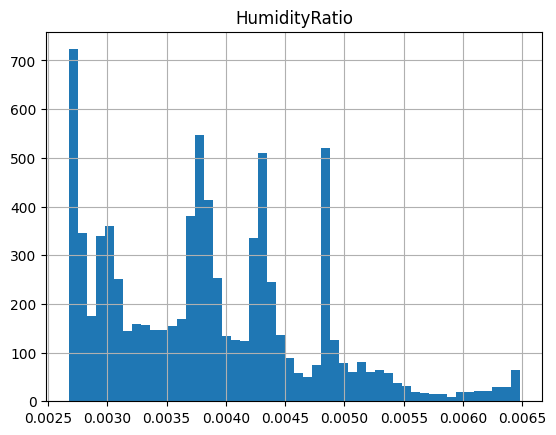

In [132]:
#Histograma para "HumidityRatio"
ocupacion_training.hist(column=['HumidityRatio'], bins=50)
light_mode=mode(ocupacion_training['HumidityRatio'])
HumidityRatio_counts = ocupacion_training['HumidityRatio'].value_counts()
HumidityRatio_counts.head(10)
#light_mode

Se puede notar que, dentro de esta variable, los datos tienen gran cantidad de registros principalmente en cuatro regiones o secciones. Dentro de este rango de valores, es posible observar diferentes picos, principalmente hacia los datos 0.002746, 0.003713 y 0.004861.

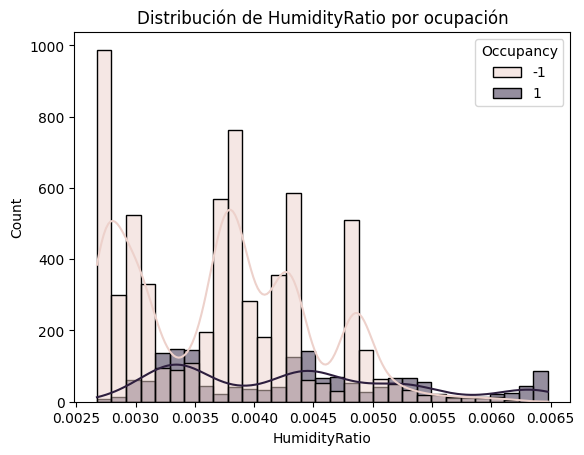

In [133]:
#Histograma de "HumidityRatio" por "Occupancy"
sns.histplot(ocupacion_training, x='HumidityRatio', hue='Occupancy', kde=True)
plt.title('Distribución de HumidityRatio por ocupación')
plt.show()

En este análisis se puede observar cláramente el cómo el registo de Ratio de humedad difiere fuertemente entre instantes con ocupación en la habitación respecto a aquellos en los que no. Adicionalmente, es coherente frente a los valores de la variable 'Humidity' analizada previamente.

*   **date:** Indica el instante en que se realizó el registro. Almacena el valor de año-mes-dia y hora:minuto:segundo de dicho momento. Para efectos de una mejor descripción y análisis de los datos se desagregará el registro de la fecha en día, hora y minuto ya que todos los registros corresponden a febrero de 2015.


In [134]:
#En cada una de los conjuntos de datos del ejercicio se da formato a la variable 'data'
ocupacion_training['date']=pd.to_datetime(ocupacion_training['date'], format="%Y-%m-%d %H:%M:%S")
ocupacion_test1['date']=pd.to_datetime(ocupacion_training['date'], format="%Y-%m-%d %H:%M:%S")
ocupacion_test2['date']=pd.to_datetime(ocupacion_training['date'], format="%Y-%m-%d %H:%M:%S")

#Se exrae el día del registro y se almacena en una nueva columna
ocupacion_training['day']= ocupacion_training['date'].dt.day
ocupacion_test1['day']= ocupacion_test1['date'].dt.day
ocupacion_test2['day']= ocupacion_test2['date'].dt.day

#Se extrae la hora del registro y se almacena en una nueva columna
ocupacion_training['hour']= ocupacion_training['date'].dt.hour
ocupacion_test1['hour']= ocupacion_test1['date'].dt.hour
ocupacion_test2['hour']= ocupacion_test2['date'].dt.hour

#Se extrae el minuto del registro y se almacena en una nueva columna
ocupacion_training['minute']= ocupacion_training['date'].dt.minute
ocupacion_test1['minute']= ocupacion_test1['date'].dt.minute
ocupacion_test2['minute']= ocupacion_test2['date'].dt.minute


print(ocupacion_training['day'].describe())
print(f"La variación de 'day' es {np.var(ocupacion_training['day'])}")
print(ocupacion_training['hour'].describe())
print(f"La variación de 'hour' es {np.var(ocupacion_training['hour'])}")
print(ocupacion_training['minute'].describe())
print(f"La variación de 'minute' es {np.var(ocupacion_training['minute'])}")


count    8143.000000
mean        7.075525
std         1.674896
min         4.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: day, dtype: float64
La variación de 'day' es 2.804930876908311
count    8143.000000
mean       11.390642
std         7.092195
min         0.000000
25%         5.000000
50%        11.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64
La variación de 'hour' es 50.29305746542194
count    8143.000000
mean       29.494290
std        17.314343
min         0.000000
25%        14.000000
50%        29.000000
75%        44.000000
max        59.000000
Name: minute, dtype: float64
La variación de 'minute' es 299.74966037887566


|           |        day|     hour|   minute|
|-----------|-----------|---------|---------|
|N. Datos   |       8143|     8143|     8143|
|Min        |     4.0000|   0.0000|   0.0000|
|Media      |   7.075525|11.390642|29.494290|
|Mediana    |     7.0000|  11.0000|  29.0000|
|Max        |    10.0000|  23.0000|  59.0000|
|D. estandar|   1.674896| 7.092195|17.314343|
|Varianza   |    2.80493| 50.29305|299.74966|

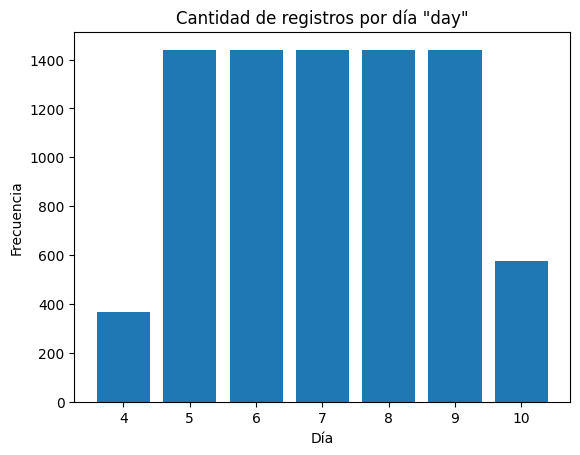

In [135]:
#Diagrama para "day"
day_counts = ocupacion_training['day'].value_counts()
day_counts_sorted = day_counts.sort_index()
plt.bar(day_counts_sorted.index, day_counts_sorted.values)

plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.title('Cantidad de registros por día "day"')
plt.show()

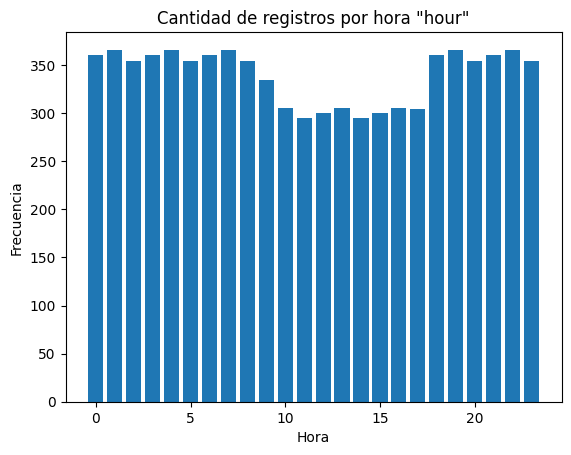

In [136]:
#Diagrama para "hour"
hour_counts = ocupacion_training['hour'].value_counts()
hour_counts_sorted = hour_counts.sort_index()
plt.bar(hour_counts_sorted.index, hour_counts_sorted.values)

plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.title('Cantidad de registros por hora "hour"')
plt.show()

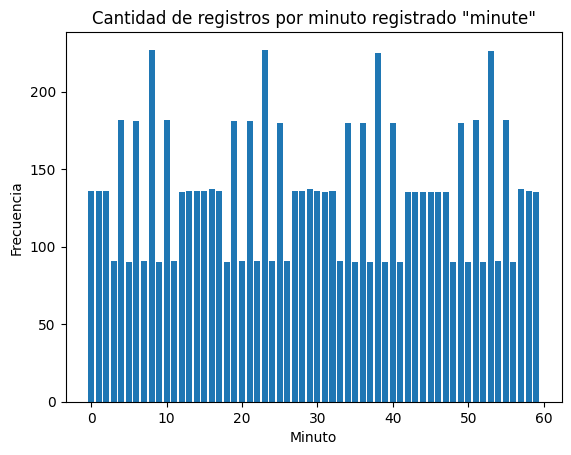

In [137]:
#Diagrama para "minute"
minute_counts = ocupacion_training['minute'].value_counts()
minute_counts_sorted = minute_counts.sort_index()
plt.bar(minute_counts_sorted.index, minute_counts_sorted.values)

plt.xlabel('Minuto')
plt.ylabel('Frecuencia')
plt.title('Cantidad de registros por minuto registrado "minute"')
plt.show()

Dentro de estas variables se puede observar que los registros fueron tomados entre el 4 y 10 de febrero de 2015 en cualquier momento del día evidenciado en la distribución casi uniforme que se presenta en el registro de la variable 'hour'

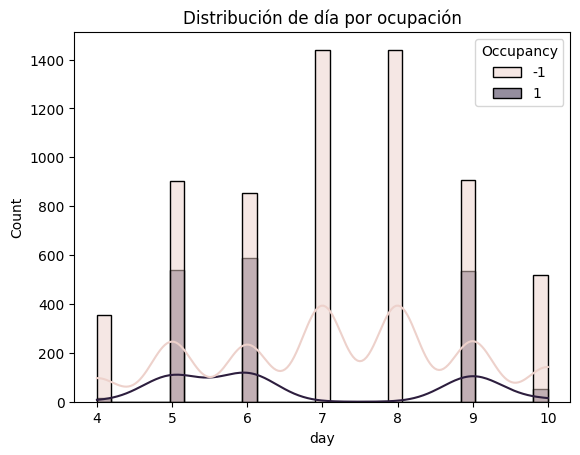

In [138]:
#Histograma de "day" por "ocupacion"
sns.histplot(ocupacion_training, x='day', hue='Occupancy', kde=True)
plt.title('Distribución de día por ocupación')
plt.show()

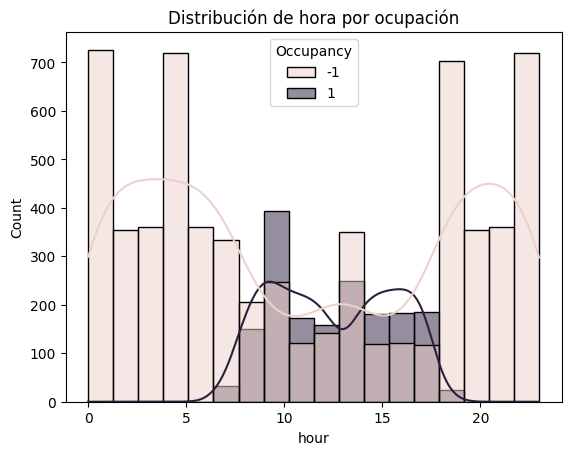

In [139]:
#Histograma de "hour" por "ocupacion"
sns.histplot(ocupacion_training, x='hour', hue='Occupancy', kde=True)
plt.title('Distribución de hora por ocupación')
plt.show()

A partir de las gráficas anteriores podemos observar que, durante los días 7 y 8 de febrero se presentó una ausencia de ocupación en la habitación. De manera similar, los días 4 y 10 de febrero se observa una baja frecuencia de registros en los que la habitación se encuentre ocupada. 

Además, se puede observar que los registros de ocupación se encuentran entre las 5 y 20 horas; antes y después de las mismas todos los registros indican que la habitación se encontraba desocupada.

Ahora, se va a observar el comportamiento entre cada par de variables para el conjunto de datos separado por clases.



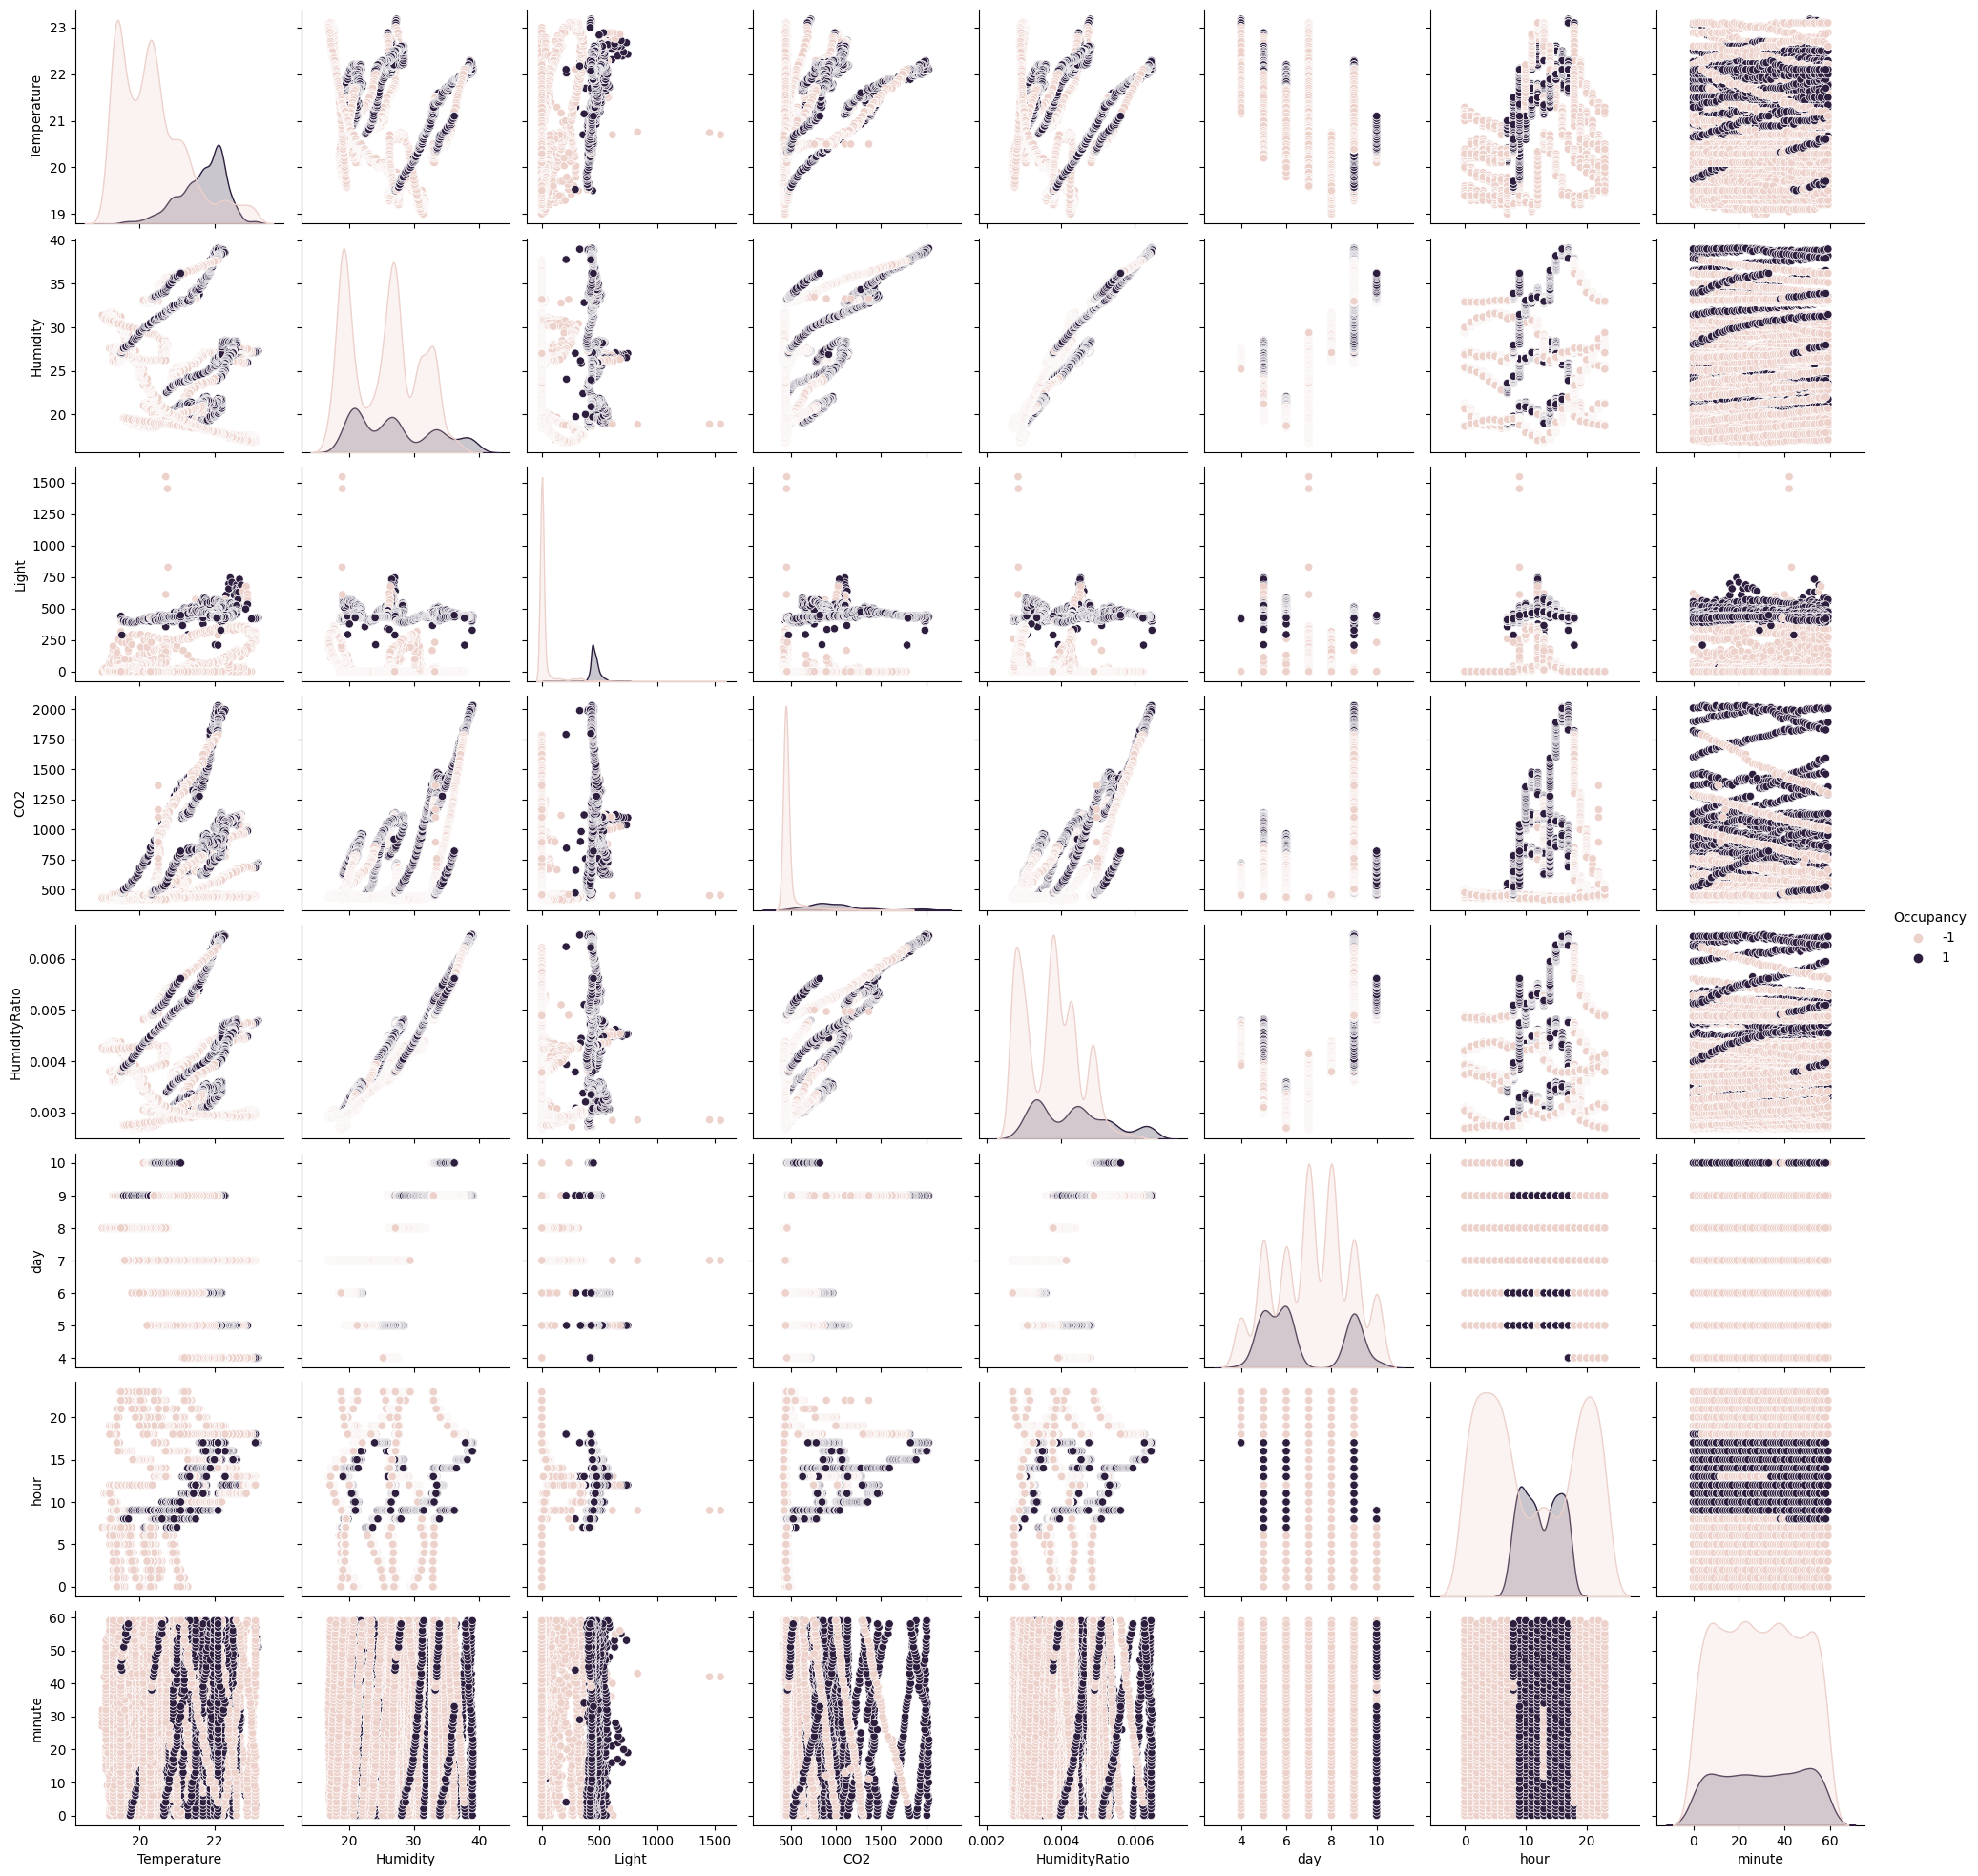

In [140]:
#ocupacion_training.corr()
#sns.pairplot(ocupacion_training)
variables = ["Temperature", "Humidity", "Light", "CO2", "HumidityRatio","day", "hour", "minute"]
#correlacion_por_clase = ocupacion_training[variables].groupby(ocupacion_training['Clase']).corr()
#print(correlacion_por_clase)
sns.pairplot(data=ocupacion_training, hue="Occupancy")

De este comportamiento se considerará adecuado el no contemplar las variables "HumidityRatio" y "minute" para el ajuste de los modelos debido a su alta correlación con la variable "Humidity" y a la relevancia que puede tener en el mismo respectivamente.


In [141]:
ocupacion_training_variables=ocupacion_training[["Temperature","Humidity","Light","CO2", "day", "hour"]]
ocupacion_training_clase=ocupacion_training[["Occupancy"]]
ocupacion_test1_variables=ocupacion_test1[["Temperature","Humidity","Light","CO2", "day", "hour"]]
ocupacion_test1_clase=ocupacion_test1[["Occupancy"]]
ocupacion_test2_variables=ocupacion_test2[["Temperature","Humidity","Light","CO2", "day", "hour"]]
ocupacion_test2_clase=ocupacion_test2[["Occupancy"]]

A continuación aplicamos algunos métodos como el SVM, regresión lineal y logística a nuestro conjunto de datos.  

**SVM**

Para este modelo o técnica se considerará como metidad de ajuste el "accuracy" debido a que nos brinda la presición del modelo teniendo en cuenta tanto el total de aciertos como de fallos bien sea falsos o ciertos.

In [142]:
svm_model = SVC(kernel='linear')
svm_model.fit(ocupacion_training_variables, ocupacion_training_clase)
y_pred = svm_model.predict(ocupacion_test1_variables)

presicion = accuracy_score(ocupacion_test1_clase, y_pred)
print('La precisión del modelo SVM ajustado a los datos es', presicion)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


La precisión del modelo SVM ajustado a los datos es 0.9789868667917448


**Regresión lineal**

Para esto se considerará como metidad de ajuste el "MSE" mide el promedio de los errores cuadráticos entre las predicciones y los valores reales.

In [143]:
reg_model = LinearRegression()
reg_model.fit(ocupacion_training_variables, ocupacion_training_clase)
y_pred = reg_model.predict(ocupacion_test1_variables)

MSE = mean_squared_error(ocupacion_test1_clase, y_pred)
print('El error cuadrático medio del modelo de regresión lineal ajustado a los datos es', MSE)

El error cuadrático medio del modelo de regresión lineal ajustado a los datos es 0.1095053800936421


**Regresión logística**

Para este modelo o técnica se considerará como metidad de ajuste el "accuracy" debido a que nos brinda la presición del modelo teniendo en cuenta tanto el total de aciertos como de fallos bien sea falsos o ciertos.

In [144]:
logreg_model = LogisticRegression()
logreg_model.fit(ocupacion_training_variables, ocupacion_training_clase)
y_pred = logreg_model.predict(ocupacion_test1_variables)

accuracy = accuracy_score(ocupacion_test1_clase, y_pred)
print('La precisión del modelo de regresión logística ajustado a los datos es', accuracy)

La precisión del modelo de regresión logística ajustado a los datos es 0.9786116322701689


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Vecinos más cercanos**

Para este modelo o técnica se realizará el ajuste a partir de 7 'vecinos cercanos', además se considerará como metidad de ajuste el "accuracy" debido a que nos brinda la presición del modelo teniendo en cuenta tanto el total de aciertos como de fallos bien sea falsos o ciertos.

In [145]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(ocupacion_training_variables, ocupacion_training_clase)
y_pred = knn_model.predict(ocupacion_test1_variables)

accuracy = accuracy_score(ocupacion_test1_clase, y_pred)
print('La precisión del modelo de vecino más cercano ajustado a los datos es', accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


La precisión del modelo de vecino más cercano ajustado a los datos es 0.9606003752345216


**Árboles de decisión**

Para este modelo o técnica se considerará como metidad de ajuste el "accuracy" debido a que nos brinda la presición del modelo teniendo en cuenta tanto el total de aciertos como de fallos bien sea falsos o ciertos.

In [146]:
tree_model = DecisionTreeClassifier()
tree_model.fit(ocupacion_training_variables, ocupacion_training_clase)
y_pred = tree_model.predict(ocupacion_test1_variables)

accuracy = accuracy_score(ocupacion_test1_clase, y_pred)
print('La precisión del modelo de árboles de decisión ajustado a los datos es', accuracy)

La precisión del modelo de árboles de decisión ajustado a los datos es 0.9774859287054409


3. 
* **¿Son linealmente separables los datos?:** Como se mostró anteriormente de manera gráfica, en un principio podría creerse que no se pueden separar debido a la superposición de los 'puntos'. Sin embargo, a partir del método SVM es posible encontrar los valores del hiperplano que separa dichos puntos.

* **¿Los datos son tomados de manera aleatoria?:** En el momento con los registros que se cuentan no sería posible determinar a ciencia cierta si estos fueron o no tomados de manera aleatoria ya que depende del diseño experimental con el que se contó para obtener cada uno de los registros. Sin embargo, según las estadísticas que se lograron obtener se podría suponer que estos si fueron tomados aleatoriamente al no evidenciar un sesgo notorio hacia cierto valor o clasificación.

* **¿La muestra es suficiente para generalización?:** A partir de los resultados de los diferentes modelos es posible observar que existe un buen desempeño dentro de los modelos frente a los resultados de generalización aún cuando la cantidad de datos apriori puede parecer no ser lo suficientemente grande. Acá también cabe resaltar que entre más datos se tenga es mayor el costo computacional que se tiene y que aún así los resultados de los ajustes son significativamente buenos como se resume a continuación:

|        |SVM    |R. Lineal|R.Logística|Vecinos cercanos|Árbol decisión|
|--------|-------|---------|-----------|----------------|--------------|
|Accuracy|0.97899|         |    0.97861|        0.960600|      0.977486|
|MSE     |       |  0.10950|           |                |              |
